In [17]:
'''Train with PyTorch.'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
import torch.utils.data as data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

cancer_types = ['口腔、口咽及下咽','主唾液腺','鼻咽','食道','胃','小腸','結直腸','肝及肝內膽管','膽囊及肝外膽管','胰','後腹膜腔及腹膜'
				,'消化器官其他分界不明部位','鼻腔、中耳及副鼻竇','喉','肺、支氣管及氣管','胸膜','胸腺、心臟與中隔','骨、關節及關節軟骨'
				,'結締組織、皮下組織及其他軟組織','皮膚','膀胱','腎','腎盂及其他泌尿系統','眼及淚腺','腦','其他神經系統','甲狀腺','其他內分泌腺'
				,'其他分界不明的部位','不明原發部位','何杰金氏淋巴瘤','白血病','非何杰金氏淋巴瘤','全癌症']
df = pd.read_csv('File_17848.csv',encoding='Big5')
def generate_dataset(country,sex,cancer):
	filter = (df['縣市別']==country)
	df_new = df[filter]
	filter = (df_new['性別']==sex)
	df_new = df_new[filter] 
	filter = (df_new['癌症別']==cancer)
	df_new = df_new[filter]
	return df_new

def generate_countries_compare_dataset(years,sex,cancer):
	filter = (df['癌症診斷年']==years)
	df_new = df[filter]
	filter = (df_new['性別']==sex)
	df_new = df_new[filter] 
	filter = (df_new['癌症別']==cancer)
	df_new = df_new[filter]
	return df_new
def generate_sex_compare_dataset(years,country,cancer):
	filter = (df['癌症診斷年']==years)
	df_new = df[filter] 
	filter = (df_new['縣市別']==country)
	df_new = df_new[filter] 
	filter = (df_new['癌症別']==cancer)
	df_new = df_new[filter]
	filter = (df_new['性別']=='男')
	df_male = df_new[filter]
	filter = (df_new['性別']=='女')
	df_female = df_new[filter]
	return df_male,df_female


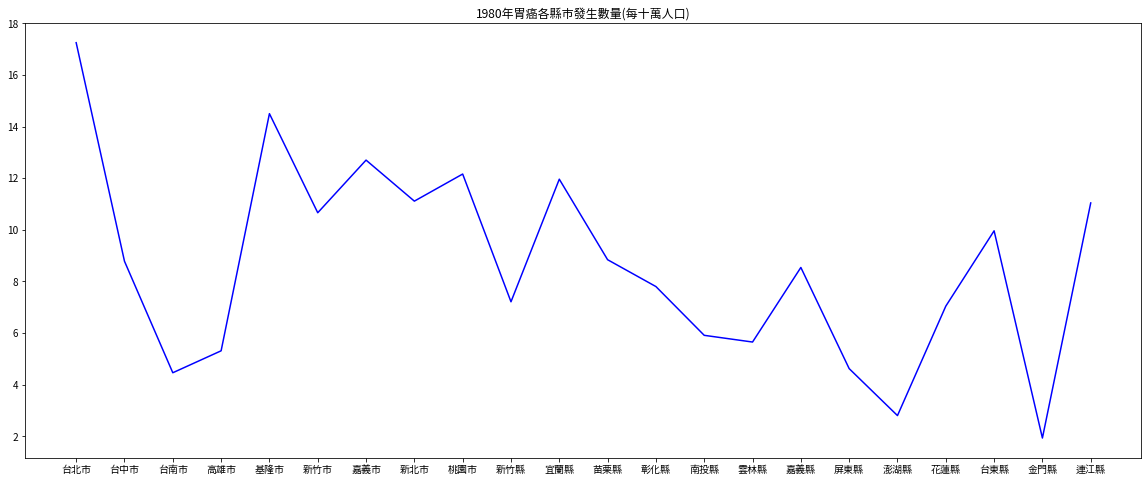

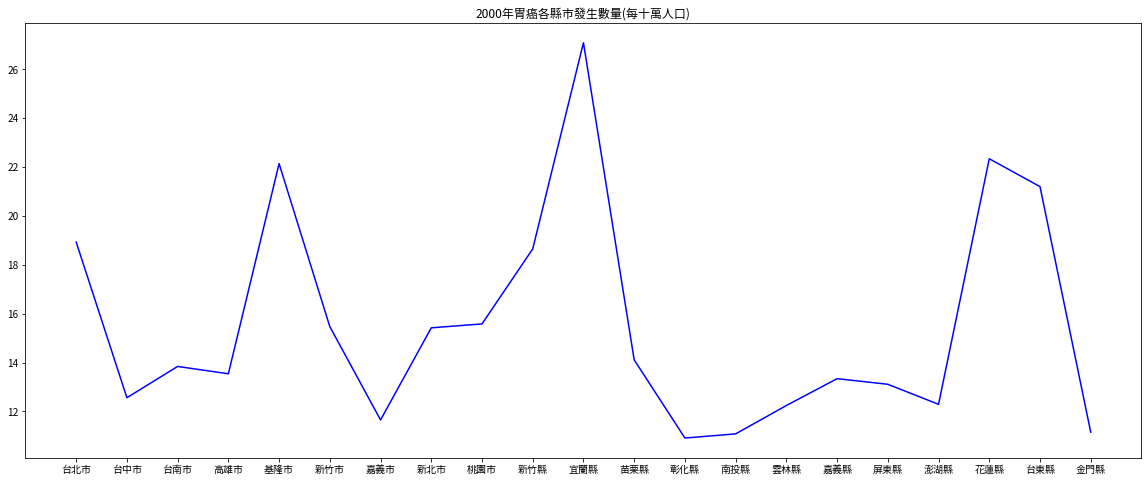

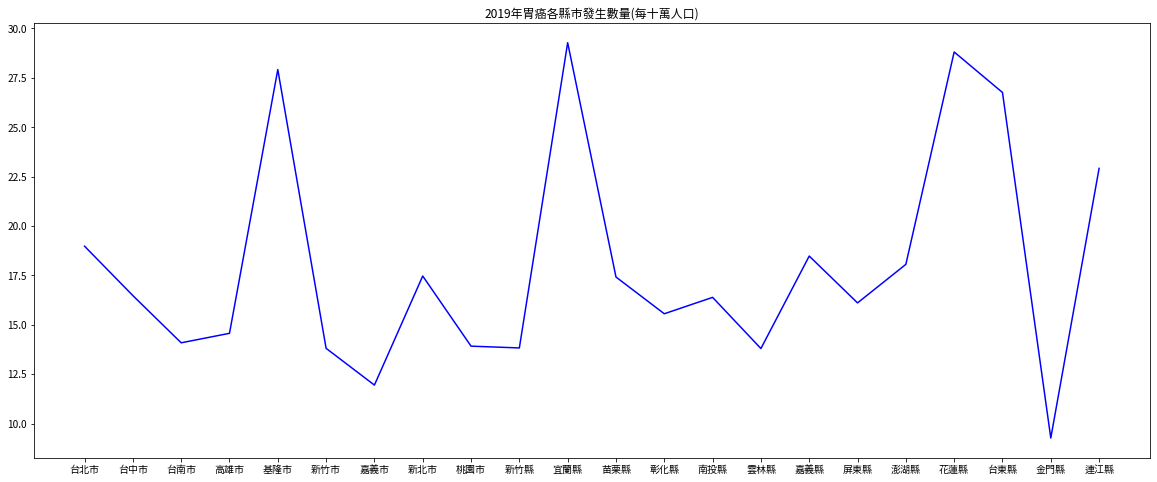

In [18]:
stomach_1980 = generate_countries_compare_dataset(1980,"全","胃")
pancreas_1980 = generate_countries_compare_dataset(1980,"全","胰")
intestine_1980 = generate_countries_compare_dataset(1980,"全","小腸")
stomach_1980.drop(stomach_1980.index[0],inplace=True)
pancreas_1980.drop(pancreas_1980.index[0],inplace=True)
intestine_1980.drop(intestine_1980.index[0],inplace=True)
stomach_2000 = generate_countries_compare_dataset(2000,"全","胃")
pancreas_2000 = generate_countries_compare_dataset(2000,"全","胰")
intestine_2000 = generate_countries_compare_dataset(2000,"全","小腸")
stomach_2000.drop(stomach_2000.index[0],inplace=True)
pancreas_2000.drop(pancreas_2000.index[0],inplace=True)
intestine_2000.drop(intestine_2000.index[0],inplace=True)
stomach_2019 = generate_countries_compare_dataset(2019,"全","胃")
pancreas_2019 = generate_countries_compare_dataset(2019,"全","胰")
intestine_2019 = generate_countries_compare_dataset(2019,"全","小腸")
stomach_2019.drop(stomach_2019.index[0],inplace=True)
pancreas_2019.drop(pancreas_2019.index[0],inplace=True)
intestine_2019.drop(intestine_2019.index[0],inplace=True)

plt.figure(figsize=(20,8))
plt.title('1980年胃癌各縣市發生數量(每十萬人口)')
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.plot(stomach_1980['縣市別'], stomach_1980['粗率 (每10萬人口)'], color='b')
plt.show()
plt.figure(figsize=(20,8))
plt.title('2000年胃癌各縣市發生數量(每十萬人口)')
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.plot(stomach_2000['縣市別'], stomach_2000['粗率 (每10萬人口)'], color='b')
plt.show()
plt.figure(figsize=(20,8))
plt.title('2019年胃癌各縣市發生數量(每十萬人口)')
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.plot(stomach_2019['縣市別'], stomach_2019['粗率 (每10萬人口)'], color='b')
plt.show()


[15.05, 5.08]
[16.57, 6.28]
[19.92, 8.56]
[28.24, 12.37]
[42.71, 19.55]
[50.08, 25.77]
[59.5, 35.04]
[67.32, 47.44]


'for i in range (1980,2019,5):\n    lung_2000_male , lung_2000_female= generate_sex_compare_dataset(i,"全國","皮膚")\n    plt.figure(figsize=(16,16))\n    X = [\'男\',\'女\']\n    Y = [float(lung_2000_male[\'粗率 (每10萬人口)\']),float(lung_2000_female[\'粗率 (每10萬人口)\'])]\n    print(Y)\n    plt.subplot(3,3,subplot_index)\n    subplot_index = subplot_index + 1\n    plt.bar(range(2),Y, align = \'center\',color= \'steelblue\', alpha = 0.8)\n    plt.xticks(range(2),X)\n    plt.title(str(i)+\'年 皮膚癌人數(每10萬人口)\')'

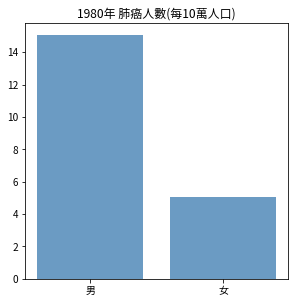

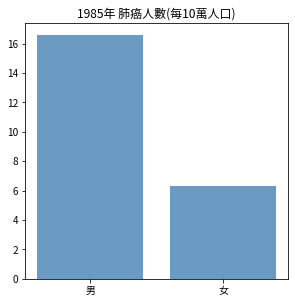

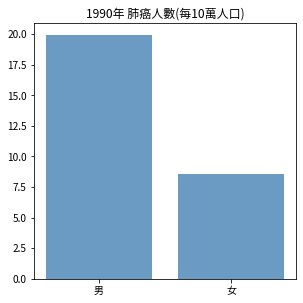

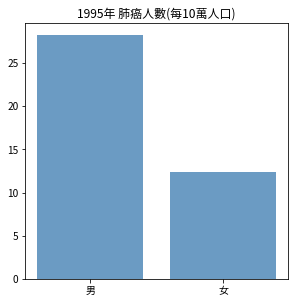

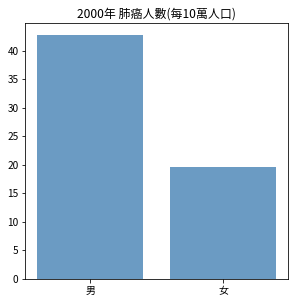

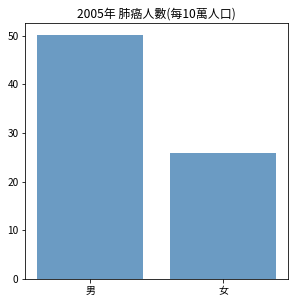

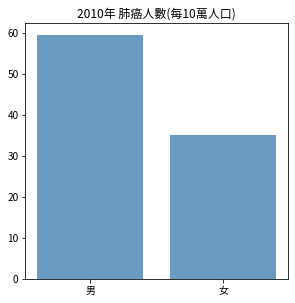

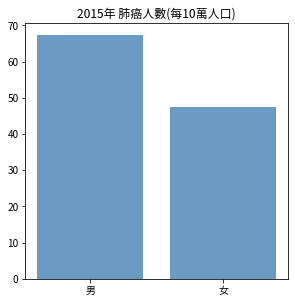

In [19]:
subplot_index = 1
for i in range (1980,2020,5):
    lung_2000_male , lung_2000_female= generate_sex_compare_dataset(i,"全國","肺、支氣管及氣管")
    plt.figure(figsize=(16,16))
    X = ['男','女']
    Y = [float(lung_2000_male['粗率 (每10萬人口)']),float(lung_2000_female['粗率 (每10萬人口)'])]
    print(Y)
    plt.subplot(3,3,subplot_index)
    subplot_index = subplot_index + 1
    plt.bar(range(2),Y, align = 'center',color= 'steelblue', alpha = 0.8)
    plt.xticks(range(2),X)
    plt.title(str(i)+'年 肺癌人數(每10萬人口)')
subplot_index = 1
'''for i in range (1980,2019,5):
    lung_2000_male , lung_2000_female= generate_sex_compare_dataset(i,"全國","皮膚")
    plt.figure(figsize=(16,16))
    X = ['男','女']
    Y = [float(lung_2000_male['粗率 (每10萬人口)']),float(lung_2000_female['粗率 (每10萬人口)'])]
    print(Y)
    plt.subplot(3,3,subplot_index)
    subplot_index = subplot_index + 1
    plt.bar(range(2),Y, align = 'center',color= 'steelblue', alpha = 0.8)
    plt.xticks(range(2),X)
    plt.title(str(i)+'年 皮膚癌人數(每10萬人口)')'''

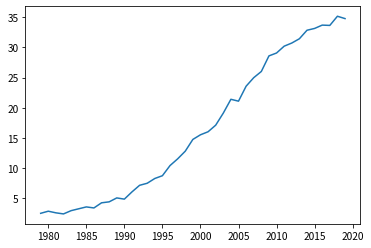

In [20]:
test = generate_dataset("全國","全","口腔、口咽及下咽")
plt.plot(test['癌症診斷年'],test['粗率 (每10萬人口)'])

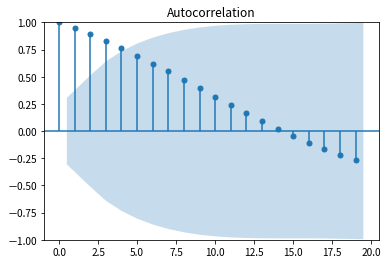

c:\Users\patri\anaconda3\envs\DA\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


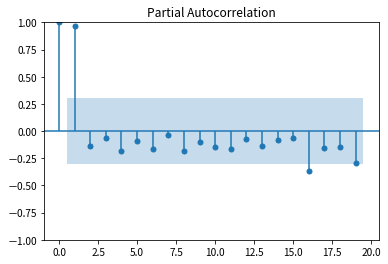

In [21]:


# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(test['粗率 (每10萬人口)'], lags=19)
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(test['粗率 (每10萬人口)'], lags=19)
plt.show()

Epoch 1/100
25/25 - 0s - loss: 0.0668
Epoch 2/100
25/25 - 0s - loss: 0.0573
Epoch 3/100
25/25 - 0s - loss: 0.0498
Epoch 4/100
25/25 - 0s - loss: 0.0437
Epoch 5/100
25/25 - 0s - loss: 0.0392
Epoch 6/100
25/25 - 0s - loss: 0.0352
Epoch 7/100
25/25 - 0s - loss: 0.0324
Epoch 8/100
25/25 - 0s - loss: 0.0301
Epoch 9/100
25/25 - 0s - loss: 0.0285
Epoch 10/100
25/25 - 0s - loss: 0.0272
Epoch 11/100
25/25 - 0s - loss: 0.0262
Epoch 12/100
25/25 - 0s - loss: 0.0255
Epoch 13/100
25/25 - 0s - loss: 0.0248
Epoch 14/100
25/25 - 0s - loss: 0.0242
Epoch 15/100
25/25 - 0s - loss: 0.0236
Epoch 16/100
25/25 - 0s - loss: 0.0232
Epoch 17/100
25/25 - 0s - loss: 0.0228
Epoch 18/100
25/25 - 0s - loss: 0.0221
Epoch 19/100
25/25 - 0s - loss: 0.0217
Epoch 20/100
25/25 - 0s - loss: 0.0210
Epoch 21/100
25/25 - 0s - loss: 0.0206
Epoch 22/100
25/25 - 0s - loss: 0.0200
Epoch 23/100
25/25 - 0s - loss: 0.0194
Epoch 24/100
25/25 - 0s - loss: 0.0188
Epoch 25/100
25/25 - 0s - loss: 0.0185
Epoch 26/100
25/25 - 0s - loss: 0.

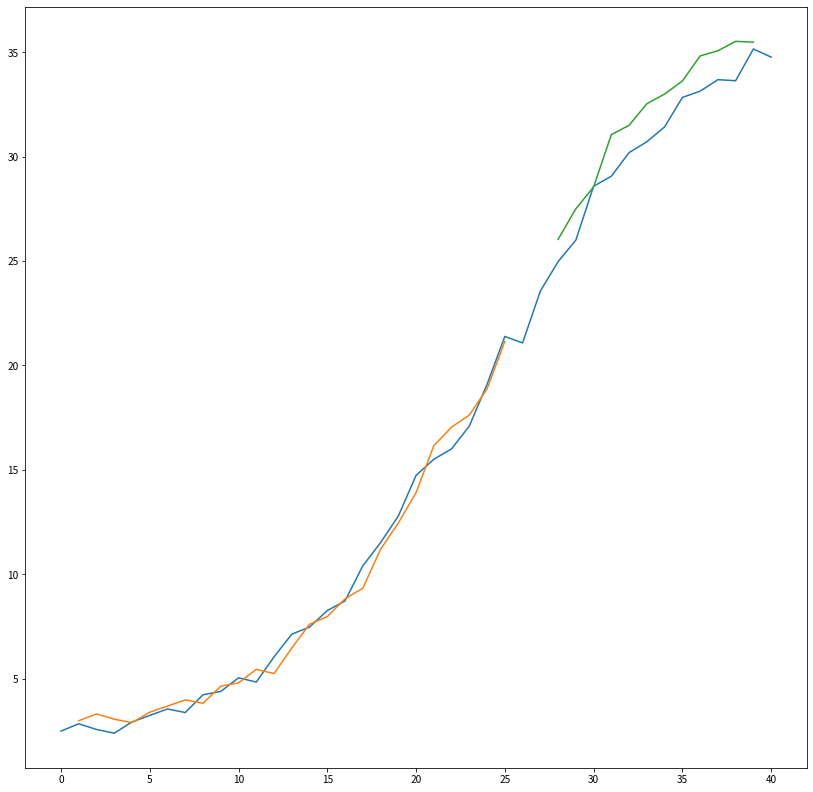

In [22]:
def create_dataset(dataset, front=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-front-1):
		a = dataset[i:(i+front), 0]
		dataX.append(a)
		dataY.append(dataset[i + front, 0])
	return np.array(dataX), np.array(dataY)
dataframe = generate_dataset("全國","全","口腔、口咽及下咽")
dataframe = dataframe[['粗率 (每10萬人口)']]
dataset = dataframe.values
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


front = 1
train_X, train_Y = create_dataset(train, front)
test_X, test_Y = create_dataset(test, front)

train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# 建立及訓練 LSTM 模型
model = Sequential()
model.add(LSTM(4, input_shape=(1, front)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=2)

# 預測
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
train_Y = scaler.inverse_transform([train_Y])
testPredict = scaler.inverse_transform(testPredict)
test_Y = scaler.inverse_transform([test_Y])


trainScore = math.sqrt(mean_squared_error(train_Y[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_Y[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[front:len(trainPredict)+front, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(front*2)+1:len(dataset)-1, :] = testPredict

# 畫原始資料趨勢圖
# plot baseline and predictions
fig = plt.figure(figsize = (14,14))
#plt.subplot(231)
plt.plot(scaler.inverse_transform(dataset))
#plt.subplot(232)
plt.plot(trainPredictPlot)
#plt.subplot(233)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
25/25 - 0s - loss: 0.0529
Epoch 2/100
25/25 - 0s - loss: 0.0417
Epoch 3/100
25/25 - 0s - loss: 0.0341
Epoch 4/100
25/25 - 0s - loss: 0.0289
Epoch 5/100
25/25 - 0s - loss: 0.0253
Epoch 6/100
25/25 - 0s - loss: 0.0228
Epoch 7/100
25/25 - 0s - loss: 0.0219
Epoch 8/100
25/25 - 0s - loss: 0.0210
Epoch 9/100
25/25 - 0s - loss: 0.0206
Epoch 10/100
25/25 - 0s - loss: 0.0204
Epoch 11/100
25/25 - 0s - loss: 0.0206
Epoch 12/100
25/25 - 0s - loss: 0.0199
Epoch 13/100
25/25 - 0s - loss: 0.0199
Epoch 14/100
25/25 - 0s - loss: 0.0199
Epoch 15/100
25/25 - 0s - loss: 0.0196
Epoch 16/100
25/25 - 0s - loss: 0.0195
Epoch 17/100
25/25 - 0s - loss: 0.0195
Epoch 18/100
25/25 - 0s - loss: 0.0194
Epoch 19/100
25/25 - 0s - loss: 0.0191
Epoch 20/100
25/25 - 0s - loss: 0.0191
Epoch 21/100
25/25 - 0s - loss: 0.0190
Epoch 22/100
25/25 - 0s - loss: 0.0188
Epoch 23/100
25/25 - 0s - loss: 0.0187
Epoch 24/100
25/25 - 0s - loss: 0.0186
Epoch 25/100
25/25 - 0s - loss: 0.0186
Epoch 26/100
25/25 - 0s - loss: 0.

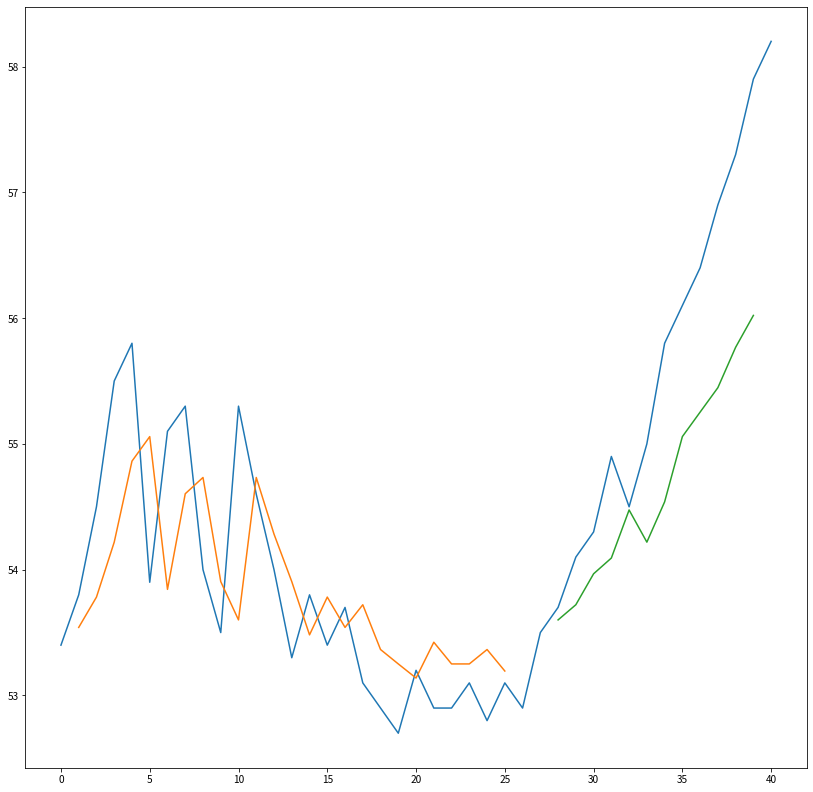

In [24]:

cancer_types = ['口腔、口咽及下咽','主唾液腺','鼻咽','食道','胃','小腸','結直腸','肝及肝內膽管','膽囊及肝外膽管','胰','後腹膜腔及腹膜'
				,'消化器官其他分界不明部位','鼻腔、中耳及副鼻竇','喉','肺、支氣管及氣管','胸膜','胸腺、心臟與中隔','骨、關節及關節軟骨'
				,'結締組織、皮下組織及其他軟組織','皮膚','膀胱','腎','腎盂及其他泌尿系統','眼及淚腺','腦','其他神經系統','甲狀腺','其他內分泌腺'
				,'其他分界不明的部位','不明原發部位','何杰金氏淋巴瘤','白血病','非何杰金氏淋巴瘤','全癌症']

dataframe = generate_dataset("全國","全","口腔、口咽及下咽")
dataframe = dataframe[['平均年齡']]
dataset = dataframe.values
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


look_back = 1
train_X, train_Y = create_dataset(train, look_back)
test_X, test_Y = create_dataset(test, look_back)

train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# 建立及訓練 LSTM 模型
model = Sequential()
model.add(LSTM(10, input_shape=(1, look_back)))#input_shape:幾筆資料以及feature數目是多少
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=2)

# 預測
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
train_Y = scaler.inverse_transform([train_Y])
testPredict = scaler.inverse_transform(testPredict)
test_Y = scaler.inverse_transform([test_Y])


trainScore = math.sqrt(mean_squared_error(train_Y[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_Y[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# 畫原始資料趨勢圖
# plot baseline and predictions
fig = plt.figure(figsize = (14,14))
#plt.subplot(231)
plt.plot(scaler.inverse_transform(dataset))
#plt.subplot(232)
plt.plot(trainPredictPlot)
#plt.subplot(233)
plt.plot(testPredictPlot)
plt.show()